### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk 
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import  LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

### Read the dataset

In [2]:
df=pd.read_csv("Tweets.csv")

In [3]:
df.shape

(14640, 15)

In [4]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### Visualization

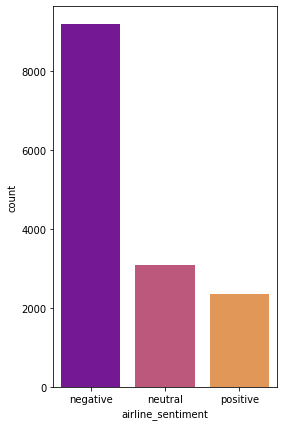

In [5]:
plt.figure(figsize=(4,7))
sns.countplot(df['airline_sentiment'], order=df.airline_sentiment.value_counts().index,palette= 'plasma')
plt.show()

Majorities of the feedbacks are negative.

#### Visualizing sentiments for each airline

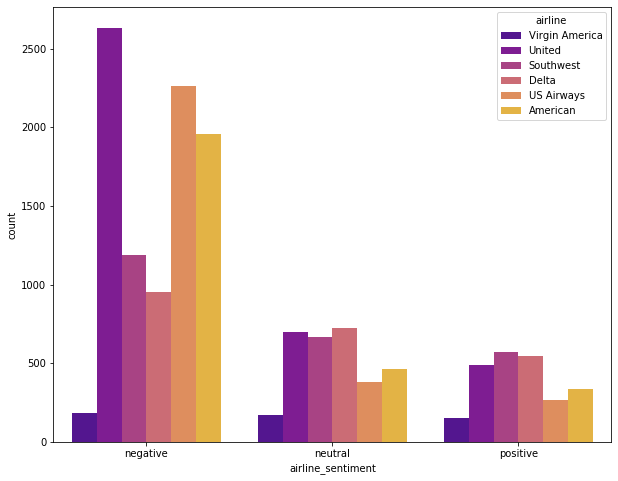

In [6]:
plt.figure(figsize=(10,8))
sns.countplot(df['airline_sentiment'], order=df.airline_sentiment.value_counts().index,palette= 'plasma', hue=df['airline'])
plt.show()

### Wordcloud for records with negative sentiment

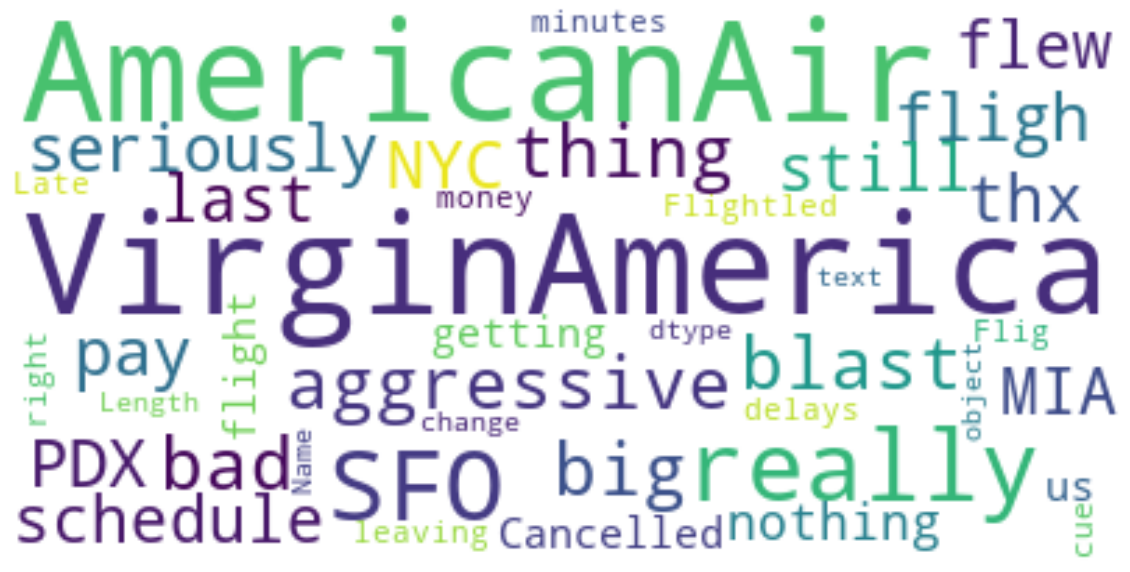

In [7]:
wordcloud = WordCloud(background_color="white").generate(str(df['text'].loc[df['airline_sentiment']=='negative']))
plt.figure(figsize = (20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Wordcloud for records with positive sentiment

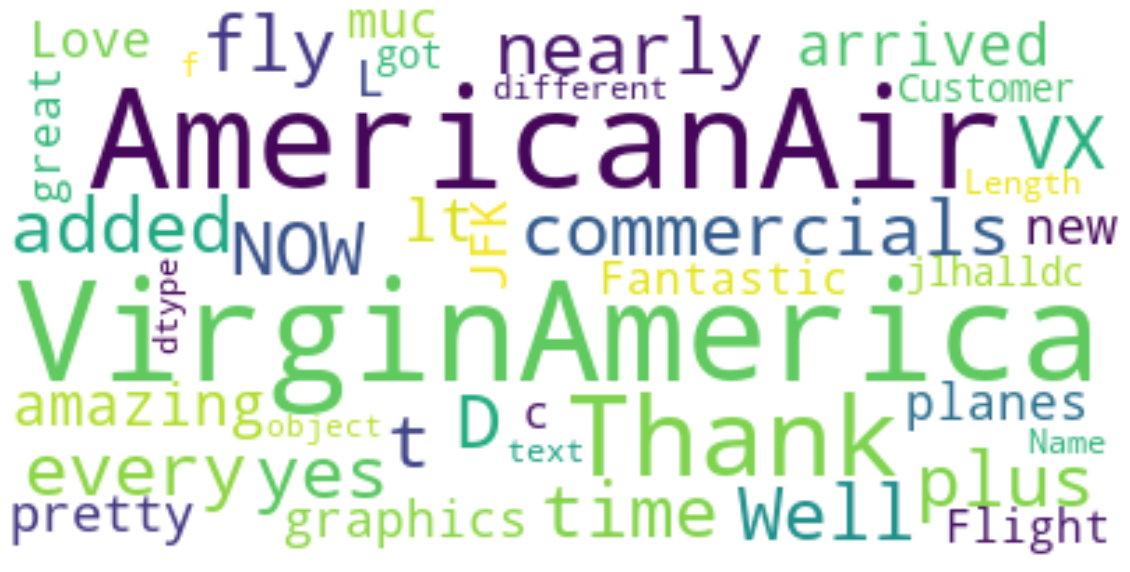

In [8]:
wordcloud = WordCloud(background_color="white").generate(str(df['text'].loc[df['airline_sentiment']=='positive']))
plt.figure(figsize = (20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [9]:
x=df.iloc[:,10]
y=df.iloc[:,1]

In [10]:
import re 
print(x.head())


0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
Name: text, dtype: object


### Text Cleaning

In [11]:
text=[]
for i in range(0,len(x)):
    clean_text=re.sub(r'\W',' ',str(x[i]))
    clean_text=re.sub(r'\s+[a-zA-Z]\s+',' ',clean_text)
    clean_text=re.sub(r'\^[a-zA-Z]\s+',' ',clean_text)
    clean_text=re.sub(r'\s+',' ',clean_text)
    clean_text=clean_text.lower()
    text.append(clean_text)
    
    
    
    

In [12]:
text

[' virginamerica what dhepburn said ',
 ' virginamerica plus you ve added commercials to the experience tacky ',
 ' virginamerica didn today must mean need to take another trip ',
 ' virginamerica it really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse',
 ' virginamerica and it a really big bad thing about it',
 ' virginamerica seriously would pay 30 flight for seats that didn have this playing it really the only bad thing about flying va',
 ' virginamerica yes nearly every time fly vx this ear worm won go away ',
 ' virginamerica really missed prime opportunity for men without hats parody there https co mwpg7grezp',
 ' virginamerica well didn but now do d',
 ' virginamerica it was amazing and arrived an hour early you re too good to me ',
 ' virginamerica did you know that suicide is the second leading cause of death among teens 10 24',
 ' virginamerica lt 3 pretty graphics so much better than minimal iconography d',
 ' virginamerica th

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cmsub\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
newdata=TfidfVectorizer(max_features=2000,stop_words=stopwords.words('english'))

In [15]:
newx=newdata.fit_transform(text)


In [16]:
newx.shape

(14640, 2000)

In [17]:
tfidf=TfidfTransformer()
newx=tfidf.fit_transform(newx)

In [18]:
norm = Normalizer()
newx=norm.fit_transform(newx)

### Label Encoding the target variable

In [19]:
l1=LabelEncoder()
y=l1.fit_transform(y)


In [20]:
xtrain,xtest,ytrain,ytest=train_test_split(newx,y,train_size=0.8,random_state=100)

## Model Building

### MLP Classifier

In [21]:
algo=MLPClassifier()
algo.fit(xtrain,ytrain)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [22]:
ypre=algo.predict(xtest)

In [23]:
print(confusion_matrix(ytest,ypre))
print(accuracy_score(ytest,ypre))

[[1553  205  105]
 [ 214  299   85]
 [  83   77  307]]
0.737363387978142


### Random Forest Classifier

In [24]:
algo2=RandomForestClassifier(n_estimators=10)
algo2.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
ypred=algo2.predict(xtest)

In [26]:
confusion_matrix(ytest,ypred)

array([[1727,   94,   42],
       [ 337,  212,   49],
       [ 159,   75,  233]], dtype=int64)

In [27]:
accuracy_score(ytest,ypred)

0.7418032786885246

### LGBM Classifier

In [28]:
lgbm=LGBMClassifier(n_jobs=-1)
lgbm.fit(xtrain, ytrain)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [29]:
lgbm_pred = lgbm.predict(xtest)

In [30]:
confusion_matrix(ytest,lgbm_pred)

array([[1692,  120,   51],
       [ 260,  283,   55],
       [ 103,   61,  303]], dtype=int64)

In [31]:
accuracy_score(ytest,lgbm_pred)

0.7780054644808743